# Project: Investigate a Dataset (TMDB movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
### Introduction

 The data set I chose to Analysis contain information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. By reading the desired file we finf that It consist of 21 columns such as imdb_id, revenue, budget, cast... etc.

here we can pose the following questions:
- Which movie has the smallest and largest revenues?
- Which movie has the smallest and largest Budget?
- What is the shortest, average and longest RunTime for the Movies?
- What is the Movie that has the most popularity?
- What is the most popular genres that we have in our dataset?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

### General Properties
we can observe the characteristics of the dataset through:
- number of rows in the dataset
- number of columns in the dataset
- features with missing values
- duplicate rows in the the dataset
- number of unique values in the dataset
And here we can observe also that:
- some columns are not useful in our analyst process exist in our dataset such as:
(id,homepage, imdb_id, production_companies,popularity,tagline,keywords, overview, budget_adj,revenue_adj)

-- So we can omit these columns from our original dataset and built a new one that can be more effective and steady to help us in our analysing process.
- Also we must change the format of the release_date column from object(str) to be datetime format.
- We also notice that some columns have Zero Values such as (runtime, budjet, revenue), so we must discard these values.
Let's begin our Cleaning process in the next fowllowing Cells.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_mov= pd.read_csv('C:/Users/USER10/Desktop/NanoDegree Projects/final_project/TMDB movie data/tmdb-movies.csv')
df_mov.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# view number of duplicated rows
sum(df_mov.duplicated())

1

In [5]:
# Drop duplicates in the dataset
df_mov.drop_duplicates(inplace= True)

In [6]:
# Confirm Drop duplicates in the dataset
sum(df_mov.duplicated())

0

In [7]:
# Removing unuseful columns from the dataset
# Create a list with the columns names that will be deleted
drop_col= ['id','imdb_id','popularity','production_companies','homepage','tagline','keywords','overview','budget_adj','revenue_adj']
# Dropping columns from dataset
df_mov= df_mov.drop(drop_col,1)
# View new dataset columns
df_mov.head(10)

,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015
5,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015
6,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015
7,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015
8,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015
9,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,6/9/15,3935,8.0,2015


In [8]:
df_mov.shape

(10865, 11)

In [9]:
# view missing value count for each feature
df_mov.isnull().sum()

budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [10]:
# Removing Zero Values from the new dataset for the columns [runtime, budjet, revenue] with NAN
df_mov['runtime']= df_mov['runtime'].replace(0,np.NAN)
df_mov['budget']= df_mov['budget'].replace(0,np.NAN)
df_mov['revenue']= df_mov['revenue'].replace(0,np.NAN)

In [11]:
df_mov.drop_duplicates(inplace=True)

In [12]:
drop_list= ['runtime','budget','revenue']
# Removing missing values
df_mov.dropna(subset= drop_list, inplace = True)
#df_mov.dropna(df_mov['budget'], inplace = True)
#df_mov.dropna(df_mov['revenue'], inplace = True)

In [13]:
df_mov.shape

(3854, 11)

In [14]:
# Changing the format of the release_date column from object(str) to be datetime format
df_mov.release_date= pd.to_datetime(df_mov['release_date'])

In [15]:
# confirming datdtype changes
df_mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 11 columns):
budget            3854 non-null float64
revenue           3854 non-null float64
original_title    3854 non-null object
cast              3850 non-null object
director          3853 non-null object
runtime           3854 non-null float64
genres            3854 non-null object
release_date      3854 non-null datetime64[ns]
vote_count        3854 non-null int64
vote_average      3854 non-null float64
release_year      3854 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 361.3+ KB


In [16]:
# Preview the changes in release_date column
df_mov.head(2)

,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Which movie has the smallest and largest Budget? )
For this question, we made some Exploratory for our dataset and obtain the followinf answers:
we have two movies that have the smallest Budget : ("Lost & Found ", "Love, Wedding, Marriage") with 1 Dollar,  
The Largest budget is for the Movie "The Warrior's Way" with (425000000) Dollars, 
The average budget for all movies is (37203696.95) Dollars

In [49]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
min_budget= df_mov['budget'].min()
max_budget= df_mov['budget'].max()
avg_budget= round(df_mov['budget'].mean(),2)
print(max_budget, min_budget, avg_budget, sep="\n")

425000000.0
1.0
37203696.95


In [18]:
df_mov.loc[df_mov['budget'] == max_budget]

,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
2244,425000000.0,11087569.0,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100.0,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,74,6.4,2010


In [19]:
df_mov.loc[df_mov['budget'] == min_budget]

,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
2618,1.0,100.0,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,95.0,Comedy|Romance,1999-04-23,14,4.8,1999
3581,1.0,1378.0,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,90.0,Comedy|Romance,2011-06-03,55,5.3,2011


### Research Question 2  (Which movie has the smallest and largest Revenue?)
For this question, we made some Exploratory for our dataset and obtain the followinf answers:
- we have two movies that have the smallest revenue : ("Shattered Glass", "Mallrats") with 2 Dollars.
- The Largest revenue is for the Movie "Avatar" with (2.781506e+09) Dollars.
- The average Revenue for all movies is (107686616.1) Dollars

In [51]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
min_revenue= df_mov['revenue'].min()
max_revenue= df_mov['revenue'].max()
avg_revenue= round(df_mov['revenue'].mean(),2)
print(min_revenue, max_revenue, avg_revenue, sep="\n")

2.0
2781505847.0
107686616.1


In [21]:
df_mov.loc[df_mov['revenue'] == min_revenue]

,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
5067,6000000.0,2.0,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,94.0,Drama|History,2003-11-14,46,6.4,2003
8142,6000000.0,2.0,Mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,94.0,Romance|Comedy,1995-10-20,201,6.8,1995


In [22]:
df_mov.loc[df_mov['revenue'] == max_revenue]

,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
1386,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009


### Research Question 3  (What is the shortest, average and longest RunTime for the Movies?)
For this question, we made some Exploratory for our dataset and obtain the followinf answers:
The average Runtime for all Movies is (109.22)
The shortest Runtime is for the Movie ("Kid's Story") for runtime value = 15.0
The Longest Runtime is for the Movie ("Carlos") for runtime value = 338.0

By looking at statical describtion for the runtime, we can say"
- 25% of movies have a runtime less than 95 minutes.
- 50% of movies have a runtime less than 106 minutes (close to mean 109.22)
- 75% of movies have a runtime less than 119 minutes.

In [23]:
df_mov['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

In [24]:
max_runtime= df_mov['runtime'].max()
avg_runtime= round(df_mov['runtime'].mean(),2)
min_runtime= df_mov['runtime'].min()
print(max_runtime,avg_runtime,min_runtime,sep="\n")

338.0
109.22
15.0


In [25]:
df_mov.loc[df_mov['runtime'] == max_runtime]

,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
2107,18000000.0,871279.0,Carlos,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Olivier Assayas,338.0,Crime|Drama|Thriller|History,2010-05-19,35,6.2,2010


In [26]:
df_mov.loc[df_mov['runtime'] == min_runtime]

,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
5162,10.0,5.0,Kid's Story,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,Shinichiro Watanabe,15.0,Science Fiction|Animation,2003-06-02,16,6.8,2003


### Sice we don't have a spesific row for average runtime, we can make a graph for this column as the following:

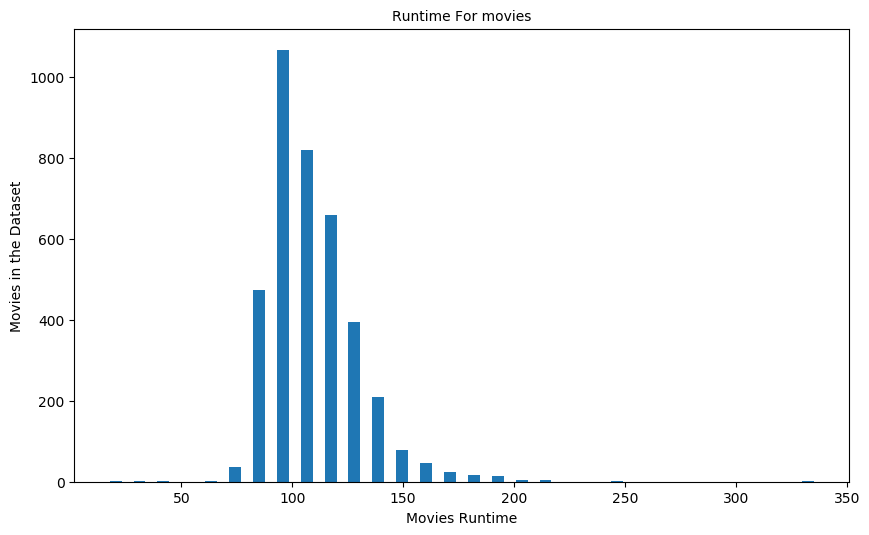

In [27]:
#plot a histogram of runtime of movies
plt.figure(figsize=(10,6), dpi = 100)
plt.xlabel('Movies Runtime', fontsize = 10)
plt.ylabel('Movies in the Dataset', fontsize= 10)
plt.title('Runtime For movies', fontsize= 10)
plt.hist(df_mov['runtime'], rwidth = 0.5, bins =30)
plt.show()

### So, we have a right skewed histogram that tell us the most runtime range is between (70 - 125) and we have more than 600 movies  exist in that range.


### Research Question 4 (What is the Movie that has the most popularity?)
To answer this question, we must look for the largest count of votting for the desired filme,
The Movie that has the most popularity is ("Inception") with vote_count value = 9767.

In [28]:
max_vote= df_mov['vote_count'].max()
print(max_vote)

9767


In [29]:
df_mov.loc[df_mov['vote_count'] == max_vote]

,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
1919,160000000.0,825500000.0,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,148.0,Action|Thriller|Science Fiction|Mystery|Adventure,2010-07-14,9767,7.9,2010


## Research Question 5 (What is the most popular genres that we have in our dataset?)
#### Here we notice that the column Genres have multiple values in each row, and these values seperated with " | " character, so first we must store these values separatly then calculate each unique value to obtain the most genres in our dataset.
#### After analysing the most popular genres in our dataset, we find that the genres "Drama" is the most popular with value of (1756)

In [36]:
# separate values in each cell with "|"
genres_sep = df_mov['genres'].str.cat(sep = '|')
# storing values separated with "|" 
genres_kind = pd.Series(genres_sep.split('|'))
# count repetatiom for each uniqe values for genres
genres_count = genres_kind.value_counts()
# print the result
genres_count

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64

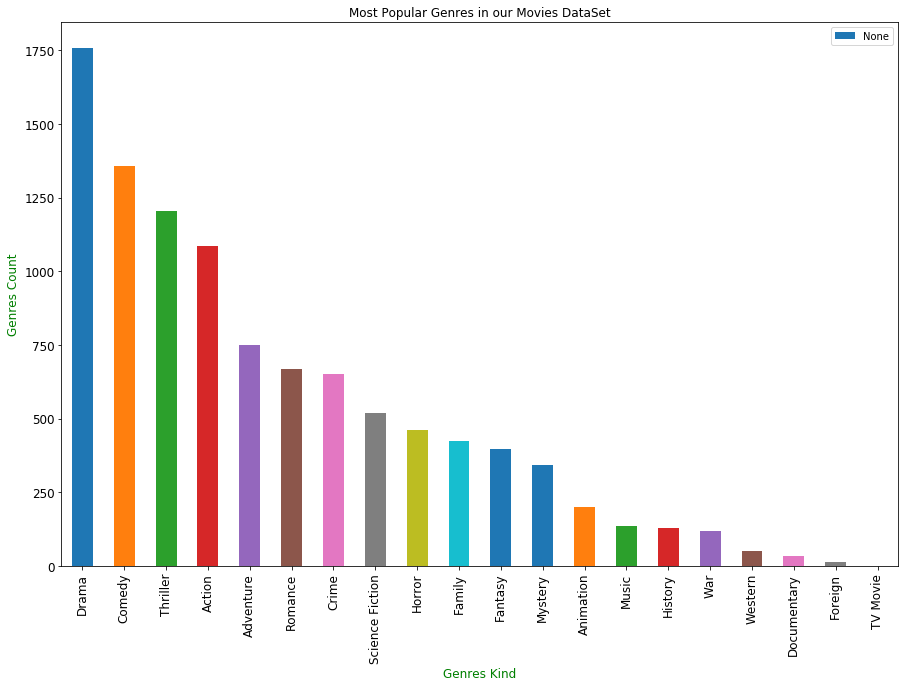

In [44]:
# plot genres count to show the most popular genres in a clear way:
genres_count.plot(kind='bar', title ="Most Popular Genres in our Movies DataSet", figsize=(15, 10), legend=True, fontsize=12)
plt.xlabel("Genres Kind", fontsize=12, color='g')
plt.ylabel("Genres Count", fontsize=12, color='g')
plt.show()

 
 ### we can also plot and find the relation between two variables, for example: relation between revenue and the release date for movies, Let's do that:

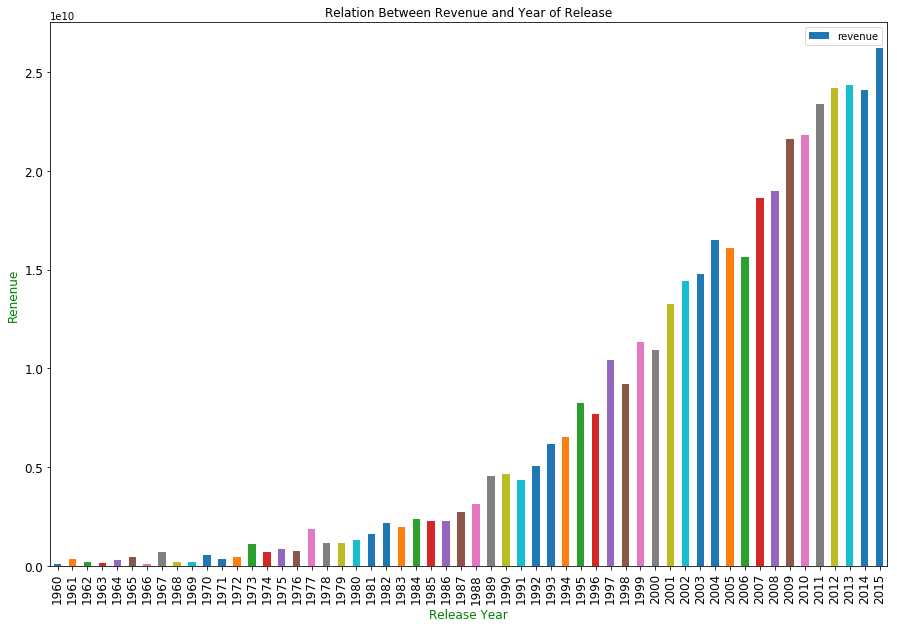

In [46]:
# We will use bar plot for this analysis
# Here we want to know the revenue of movies for each year therefore we have to group all the movies in it's release year
year_revenue= df_mov.groupby('release_year')['revenue'].sum()
year_revenue.plot(kind='bar', title ="Relation Between Revenue and Year of Release", figsize=(15, 10), legend=True, fontsize=12)
plt.xlabel("Release Year", fontsize=12, color='g')
plt.ylabel("Renenue", fontsize=12, color='g')
plt.show()

### We notice that the relation between the two variables(Revenue, Release_year) is Positive, and the revenue is increasing by increasing the release year and all movies after the year 2010 have more big revenue, and the movies that have the highest revenue located in the year 2015. 

In [31]:
year_revenue.idxmax()

2015

<a id='conclusions'></a>
## Conclusions
> we made this analysis on our dataset after cleaning the data (omit some columns, delete duplicates and missing values), and obtain the results above, so we can say that dataset is somehow sufficiant to answer questions posed to be analysis but don't know if missing value have an impact if exists, for example: missing runtime may be longer than values we found, may be the missing budget or revenue bigger or smaller than the values that we found, so I think in the future if we have a complete data set without missing values, our results may differ from our existing analysis.

> Finally, after we finish our analysing for our Movies dataset, we can draw these conclusions:
- The average budget for all movies is (37203696.95) Dollars
- The average revenue for all movies is (107686616.1) Dollars
- The average Runtime for all Movies is (109.22)
- The genres "Drama" is the most popular with value of (1756)

-- So if we want to produce an amazing filme, we must give it a budget not less than (37203696.95) Dollars with Runtime not less than (110) minutes and the genres prefered are (Drama, Comedy, Thriller, Action).
If we achive these elements, we expect to have a great filme with revenue not less than (107686616.1) Dollars.



In [52]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295